In [41]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
import altair as alt
alt.renderers.enable('default')
alt.data_transformers.enable('json')
import pandas as pd
import plotly.express as px
%matplotlib inline

# Ages of NBA Draft Picks, 1981 - 2020

## Importing the dataset

In [3]:
country = pd.read_csv("all_seasons.csv")
country


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22,213.36,106.594120,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22,205.74,106.594120,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,Matthew Dellavedova,CLE,30,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,Undrafted,...,2.8,1.8,4.5,-3.1,0.029,0.085,0.125,0.312,0.337,2020-21
11696,Maurice Harkless,SAC,28,200.66,99.790240,St. John's,USA,2012,1,15,...,5.2,2.4,1.2,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21
11697,Max Strus,MIA,25,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,Undrafted,...,6.1,1.1,0.6,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21
11698,Marcus Morris Sr.,LAC,31,203.20,98.883056,Kansas,USA,2011,1,14,...,13.4,4.1,1.0,4.2,0.025,0.133,0.194,0.614,0.056,2020-21


## Preprocessing the data

The data had multiple duplicate entries for Players for all the years that they had a change in team franchise. Hence, these had to be removed.

In [4]:
country = country.drop_duplicates(subset=['player_name'])
country

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22,213.36,106.594120,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22,205.74,106.594120,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,Malachi Flynn,TOR,23,185.42,79.378600,San Diego State,USA,2020,1,29,...,7.5,2.5,2.9,-5.6,0.010,0.114,0.183,0.484,0.225,2020-21
11679,Malik Fitts,LAC,23,203.20,104.326160,None,USA,Undrafted,Undrafted,Undrafted,...,1.0,1.0,0.0,-27.3,0.000,0.300,0.120,0.500,0.000,2020-21
11681,Mamadi Diakite,MIL,24,205.74,103.418976,Virginia,Guinea,Undrafted,Undrafted,Undrafted,...,3.1,2.4,0.6,3.8,0.052,0.160,0.142,0.477,0.079,2020-21
11687,Markus Howard,DEN,22,177.80,79.378600,Marquette,USA,Undrafted,Undrafted,Undrafted,...,2.8,0.6,0.5,-17.0,0.004,0.095,0.250,0.477,0.145,2020-21


Grouping the data by draft year and taking mean of all the numerical stats

In [5]:
k = country.groupby(['draft_year']).mean()
k

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
draft_year,,,,,,,,,,,,,
1963,24.000000,187.960000,86.182480,5.000000,1.400000,1.400000,0.800000,-10.800000,0.048000,0.128000,0.147000,0.250000,0.154000
1976,43.000000,215.900000,110.676448,43.000000,3.700000,2.100000,0.500000,14.900000,0.114000,0.130000,0.201000,0.514000,0.082000
1978,40.000000,195.580000,90.718400,32.000000,4.000000,1.300000,0.700000,-9.800000,0.017000,0.101000,0.182000,0.499000,0.104000
1979,39.500000,205.740000,96.388300,10.500000,0.550000,1.050000,0.350000,0.250000,0.086500,0.102500,0.064000,0.388000,0.097000
1980,38.000000,208.280000,117.933920,22.000000,2.500000,2.400000,0.300000,-0.100000,0.091000,0.192000,0.164000,0.440000,0.049000
1981,37.857143,207.554286,107.890097,39.142857,3.914286,2.685714,0.514286,-10.085714,0.074429,0.169286,0.165714,0.467143,0.068857
1982,35.166667,200.236667,100.395029,39.000000,7.100000,2.583333,1.050000,-7.833333,0.062833,0.142167,0.216333,0.462167,0.102000
1983,35.500000,198.882000,96.977970,57.900000,7.420000,2.410000,1.910000,-4.940000,0.043800,0.103700,0.172300,0.510700,0.162900
1984,34.555556,203.200000,107.450905,75.777778,14.477778,6.622222,3.133333,5.400000,0.075667,0.179778,0.208889,0.552667,0.155111


In [12]:
k = k.iloc[8:-1]

In [18]:
country["age"] = country["age"].apply(pd.to_numeric)
country

<ipython-input-18-9fabfb3c19f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country["age"] = country["age"].apply(pd.to_numeric)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22,213.36,106.594120,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22,205.74,106.594120,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,Malachi Flynn,TOR,23,185.42,79.378600,San Diego State,USA,2020,1,29,...,7.5,2.5,2.9,-5.6,0.010,0.114,0.183,0.484,0.225,2020-21
11679,Malik Fitts,LAC,23,203.20,104.326160,None,USA,Undrafted,Undrafted,Undrafted,...,1.0,1.0,0.0,-27.3,0.000,0.300,0.120,0.500,0.000,2020-21
11681,Mamadi Diakite,MIL,24,205.74,103.418976,Virginia,Guinea,Undrafted,Undrafted,Undrafted,...,3.1,2.4,0.6,3.8,0.052,0.160,0.142,0.477,0.079,2020-21
11687,Markus Howard,DEN,22,177.80,79.378600,Marquette,USA,Undrafted,Undrafted,Undrafted,...,2.8,0.6,0.5,-17.0,0.004,0.095,0.250,0.477,0.145,2020-21


In [35]:
country1 = country[country['draft_year'] != 'Undrafted']

In [36]:
country1 = country1.astype({'age': 'float'})
country1 = country1.astype({'draft_year': 'int32'})

In [37]:
country1

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
5,Martin Lewis,TOR,22.0,198.12,102.058200,Seward County Community College,USA,1995,2,50,...,1.6,0.7,0.4,-3.5,0.087,0.045,0.135,0.470,0.125,1996-97
6,Mark West,CLE,36.0,208.28,111.583632,Old Dominion,USA,1983,2,30,...,3.2,2.7,0.3,3.5,0.092,0.146,0.137,0.555,0.034,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11605,Josh Green,DAL,20.0,195.58,90.718400,Arizona,Australia,2020,1,18,...,2.6,2.0,0.7,1.9,0.059,0.110,0.112,0.490,0.083,2020-21
11630,Keljin Blevins,POR,25.0,193.04,90.718400,Montana State,USA,2019,Undrafted,Undrafted,...,0.7,0.6,0.2,-22.2,0.031,0.071,0.126,0.300,0.083,2020-21
11659,Nick Richards,CHA,23.0,213.36,111.130040,Kentucky,Jamaica,2020,2,42,...,0.8,0.6,0.1,-10.5,0.056,0.096,0.111,0.542,0.054,2020-21
11661,Nico Mannion,GSW,20.0,187.96,86.182480,Arizona,Italy,2020,2,48,...,4.1,1.5,2.3,-9.4,0.016,0.107,0.186,0.487,0.270,2020-21


In [51]:
country1 = country1.sort_values(by = ['draft_year'])

## Plotting a simple line graph to observe the trend

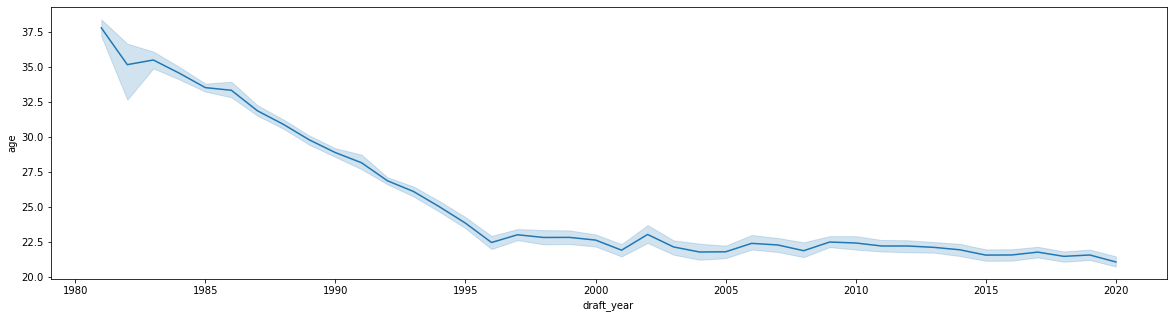

In [52]:
plt.figure(figsize=(20,5))
sns.lineplot(x='draft_year',y='age',data=country1.iloc[8:])
plt.ticklabel_format(style='plain')

## Visualization

Finally, a box plot was selected for this visualization

In [61]:
import plotly.express as px
fig = px.box(country1[8:], x="draft_year", y="age", title="Ages of NBA Draft Picks, 1981 - 2020")
fig.show()

We can clearly observe that there was a drop in average age of drafted players from 38 in 1981 to 21 in 2020. We also observed that the youngest age at which any player was drafted into the NBA was 18 for the year of 1996 and 2005. Further, we observed that from the year of 2010, the minimum age of drafted player for each consecutive year was 19. 

This is a major change that was observed over the years in the NBA Draft process and can be attributed to the fact that more and more players are getting drafted straight out of High School and the Freshman class of universities, especially from elite Basketball schools